### 1. Perform PCA on Stock Returns

Using stock returns at the daily (or monthly) level, perform a Principal Component Analysis (PCA) on daily (monthly) stock returns. 

- How many factors are needed to explain a reasonable proportion of the total variance in stock returns? 
  - *(There is no right answer to this, although there are standard share of variance measures that are some diagnostic tests).*
- **Hint**: What preprocessing should you do before performing PCA, and why?

#### Mathematical Foundation:
Principal Component Analysis (PCA) seeks to decompose the covariance matrix 
$ \Sigma $ of stock returns into eigenvalues $ \lambda_k $ and eigenvectors $ v_k $. The cumulative explained variance for $ K $ components is:

$$\text{Cumulative Variance} = \frac{\sum_{k=1}^K \lambda_k}{\sum_{k=1}^N \lambda_k}$$

### Formula for Explained Variance Ratio

For a given principal component \( i \), the explained variance ratio is:

$$
\text{Explained Variance Ratio (PC}_i\text{)} = \frac{\lambda_i}{\sum_{j=1}^{k} \lambda_j}
$$

Where:
- $ \lambda_i $: The eigenvalue corresponding to the \( i \)-th principal component (i.e., the variance captured by PC \( i \)).
- $ \sum_{j=1}^{k} \lambda_j $: The sum of eigenvalues for all \( k \) principal components (i.e., the total variance of the dataset).



<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and formulas** for this question to make it more mathematically descriptive. 
- Use information from the **PCA slides, APMA 1690, or reliable internet sources**, but ensure to **track citations** for all added content.
- Feel free to expand this section with further theoretical insights!

Sources I've used:
https://python.plainenglish.io/applying-pca-to-stocks-fbad2e51573f
https://www.pyquantnews.com/the-pyquant-newsletter/how-to-isolate-alpha-with-analysis


  Principal Component  Eigenvalue  Explained Variance (%)  \
0                 PC1  320.771439               26.704272   
1                 PC2   34.564010                2.877459   
2                 PC3   24.049584                2.002132   
3                 PC4   19.528084                1.625716   
4                 PC5   17.100488                1.423618   
5                 PC6   11.478933                0.955623   
6                 PC7   10.353682                0.861946   
7                 PC8    9.246725                0.769791   
8                 PC9    7.817822                0.650835   
9                PC10    6.655915                0.554106   

   Cumulative Variance (%)  
0                26.704272  
1                29.581731  
2                31.583863  
3                33.209579  
4                34.633197  
5                35.588820  
6                36.450765  
7                37.220557  
8                37.871392  
9                38.425497  


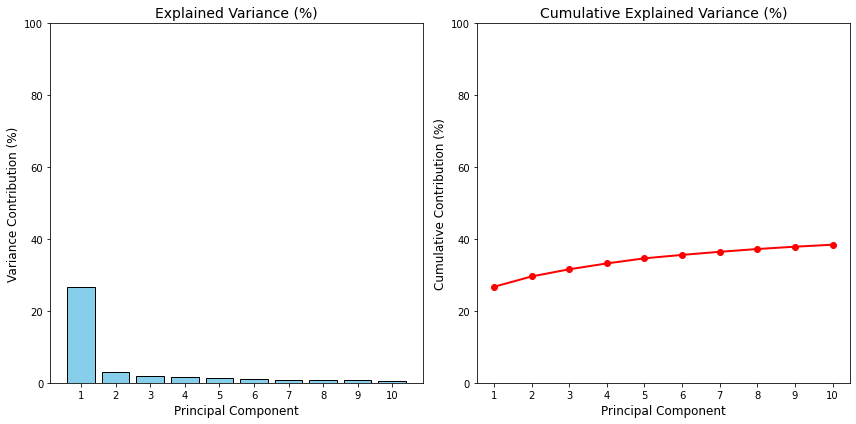

81659    0.053287
84398    0.051260
86456    0.050321
85765    0.050272
18956    0.049234
10065    0.048554
86455    0.048353
18622    0.047737
71079    0.047329
86453    0.046675
dtype: float64


In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
returns_data = pd.read_csv("preprocessed_returns.csv")
numeric_data = returns_data.drop(columns=['date'])

# Fit PCA
pca = PCA(n_components=10)
pca.fit(numeric_data)

# Extract information
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a table of eigenvalues and explained variance
results_table = pd.DataFrame({
    'Principal Component': [f"PC{i}" for i in range(1, len(eigenvalues) + 1)],
    'Eigenvalue': eigenvalues,
    'Explained Variance (%)': explained_variance_ratio * 100,
    'Cumulative Variance (%)': cumulative_variance * 100
})

print(results_table)

# Plotting
x = np.arange(1, len(explained_variance_ratio) + 1)

plt.figure(figsize=(12, 6))

# Bar chart for explained variance
plt.subplot(1, 2, 1)
plt.bar(x, explained_variance_ratio * 100, align="center", color='skyblue', edgecolor='black')
plt.title('Explained Variance (%)', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Variance Contribution (%)', fontsize=12)
plt.xticks(x)
plt.ylim([0, 100])

# Line plot for cumulative variance
plt.subplot(1, 2, 2)
plt.plot(x, cumulative_variance * 100, 'ro-', linewidth=2)
plt.title('Cumulative Explained Variance (%)', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Cumulative Contribution (%)', fontsize=12)
plt.xticks(x)
plt.ylim([0, 100])

plt.tight_layout()
plt.show()

pc1_contributions = pd.Series(pca.components_[0], index=numeric_data.columns).sort_values(ascending=False)
print(pc1_contributions.head(10))  # Top 10 contributors to PC1



### 2. Compute the First 5 Principal Components

Focus on a low number of factors: $ K = 5 $. Compute (based on the total sample for now) the $ K = 5 $ principal components.

- Each principal component should be a vector of length $ N $, the number of stocks in your universe.
- How can one translate a principal component vector $ v_k $ into a tradable portfolio? 
  - **Hint**: What should you do with the vector elements?

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and formulas** for this question to make it more mathematically descriptive. 
- Use information from the **PCA slides, APMA 1690, or reliable internet sources**, but ensure to **track citations** for all added content.
- Feel free to expand this section with further theoretical insights!

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 3. Compute Factor Returns for Each Principal Component

For each principal component vector $ v_k $, compute the factor returns for the eigenportfolio:


$$f_k^t = \sum_i \frac{v_k[i]}{\bar{\sigma}_i} \cdot r_{i,t}$$

- Where $ \bar{\sigma}_i $ is the standard deviation of stock $ i $'s returns.
- **Question**: Why do we want to normalize $ v_k $ by the standard deviation?

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 4. Correlation of First Factor Return with Market Returns

Focus on the first factor return. What is its correlation with respect to market returns?

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 5. Regression for Each Stock to Estimate $ \alpha_i $

For each stock $ i $, run the regression:

$$r_{i,t} = \alpha_i + \sum_k \beta_{k,i} f_k^t + \epsilon_{i,t}$$

What is the interpretation of $ \alpha_i $?

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 6. How does this approach differ from standard factors (i.e. using market, value, momentum)?

### 7. Construct a Trading Strategy Based on $ \alpha_i $

Using your estimates of $ \alpha_i $, design a trading strategy. If you are looking for ideas, consider the following approach:

#### 1. Stock Sorting
- Sort all stocks based on their $ \alpha_i $ values:
  - **Top Quintile**: Go long on stocks in the top quintile of $ \alpha_i $ (highest alpha values).
  - **Bottom Quintile**: Go short on stocks in the bottom quintile of $ \alpha_i $ (lowest alpha values).
- This approach effectively bets on the overperformance of stocks with high $ \alpha_i $ and underperformance of stocks with low $ \alpha_i $.

#### 2. Portfolio Weights
- At any time $ t $, assign portfolio weights $ w_{i,t} $ to each stock $ i $. These weights can be positive (long positions) or negative (short positions).
- The total portfolio return for the next time step $ t+1 $ is calculated as:
  \[
  r_{\text{port}, t+1} = \sum_{i} w_{i,t} \cdot r_{i,t+1}
  \]
  where:
  - $ w_{i,t} $ is the weight of stock $ i $ at time $ t $,
  - $ r_{i,t+1} $ is the return of stock $ i $ at time $ t+1 $.

#### 3. Creativity Encouraged
- Feel free to explore more entrepreneurial or creative strategies. You could experiment with different weighting schemes, alpha adjustments, or factor exposures.

#### 4. Avoid Look-Ahead Bias
- Ensure your trading strategy does not rely on future returns (e.g., predicting $ r_{i,t+1} $ before $ t+1 $ happens). Use only past and current data available up to time $ t $.

#### 5. Practical Implementation
- A simple starting point might include:
  - **Equal Weights**: Assign equal weights to all stocks in the top and bottom quintiles.
  - **Risk Adjusted**: Normalize weights based on volatility or other risk measures for each stock.

---

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and formulas** for this trading strategy to make it more descriptive and robust. 
- Use insights from the **PCA slides, APMA 1690, or external research papers** on trading strategies. 
- Ensure that all assumptions and data limitations are clearly cited. Expand this section with additional ideas or innovations! 

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 8. Visualize and Report Cumulative Returns

Visualize and report the cumulative returns of the trading strategy. Let $ r_{\text{port}, t} $ represent the returns of your trading strategy for time $ t $.

#### Mathematical Foundation:
The cumulative returns up to time $ T $ can be calculated as:

$$\text{Cumulative Return}_T = \prod_{t=1}^{T} (1 + r_{\text{port}, t}) - 1$$

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **mathematical foundations and visualization techniques** for this question. 
- Use insights from finance literature or PCA examples for calculating and plotting cumulative returns.

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 9. Compute the Sharpe Ratio

Compute the Sharpe ratio of your trading strategy. The Sharpe ratio measures the risk-adjusted return of a portfolio.

#### Mathematical Foundation:
The Sharpe ratio is given by:
\[
\text{Sharpe Ratio} = \frac{\mathbb{E}[r_{\text{port}}] - r_f}{\sigma_{\text{port}}}
\]
Where:
- $ \mathbb{E}[r_{\text{port}}] $ is the expected return of the portfolio,
- $ r_f $ is the risk-free rate,
- $ \sigma_{\text{port}} $ is the standard deviation of the portfolio returns.

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Let’s include the **formulas, explanations, and interpretations** for the Sharpe ratio in the context of your strategy.
- Discuss assumptions like constant $ r_f $ and ensure proper citations if you use external resources.

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 10. Compute the Information Ratio

Compute the information ratio of your trading strategy:

- Formally, run the regression:

$$r_{\text{port}, t} = \alpha + \beta r_{\text{mkt}, t}$$
Your reference return (for the information ratio) should be $ \beta \cdot r_{\text{mkt}, t} $.


#### Mathematical Foundation:
1. Perform a regression:
$$r_{\text{port}, t} = \alpha + \beta r_{\text{mkt}, t} + \epsilon_t$$
Where:
- $ r_{\text{port}, t} $ is the portfolio return at time $ t $,
- $ r_{\text{mkt}, t} $ is the market return at time $ t $,
- $ \alpha $ is the portfolio’s alpha,
- $ \beta $ is the sensitivity to the market.

2. The information ratio is calculated as:

$$\text{Information Ratio} = \frac{\alpha}{\text{Tracking Error}}$$
Where the tracking error is the standard deviation of the residuals $ \epsilon_t $.

#### Questions:
- Is your strategy market neutral (i.e., $ \beta = 0 $)? Analyze and discuss.

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Include **mathematical derivations and interpretations** for the information ratio.
- Use reliable references for definitions and ensure proper discussion of market neutrality.

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 11. Addressing Look-Ahead Bias

Note that you have estimated the PCA using the entire sample. Thus, your estimates of your trading performance should be somewhat positively biased. 

Now, repeat your exercise, where you simulate a trading strategy across time, where you:

1. Estimate your factors only based on data in the past (so at January 2015, you construct your PCAs using data up to January 2015).
2. Construct a trading strategy and see how this strategy performs.

A simple starting point is to estimate $ \alpha_i $'s using data prior to 2015 and assume $ \alpha_i $'s stay fixed afterwards. Of course, you can also update your $ \alpha_i $ estimates every day/month when you roll forward. 

Be very clear how you avoided the look-ahead bias. 

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Include **mathematical derivations and interpretations** for the information ratio.
- Use reliable references for definitions and ensure proper discussion of market neutrality.

In [ ]:
#Code goes here, Let's add visualizations/tables too

### 12. Evaluating Across Multiple Values of $ K $

Why stop at $ K = 5 $? Across multiple values of $ K $, re-do all of the above exercises.

- Which $ K $ seems to work best? 
- Is there a significant difference between in-sample assessments (where you estimate the factors based on all the data) and out-of-sample assessments (where you estimate the factors only based on data available at the time and roll forward)?

Discuss.

<span style="color:red; font-weight:bold;">🔴 Important:</span> 
- Include **mathematical derivations and interpretations** for the information ratio.
- Use reliable references for definitions and ensure proper discussion of market neutrality.